In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/DSL/24-2 EDA'
os.chdir(PATH)

In [1]:
# 취업 1년 후 데이터 불러오기

df_worker = pd.read_csv('refined0.csv', encoding='ISO-8859-1')

NameError: name 'pd' is not defined

In [ ]:
# 대학교 데이터 불러오기

df_grade1 = pd.read_csv('hn1data.csv', encoding='ISO-8859-1')
df_grade2 = pd.read_csv('hn2data.csv', encoding='ISO-8859-1')
df_grade3 = pd.read_csv('hn3data.csv', encoding='ISO-8859-1')
df_grade4 = pd.read_csv('hn4data.csv', encoding='ISO-8859-1')

In [ ]:
shape1 = df_worker.shape

shape2 = df_grade1.shape
shape3 = df_grade2.shape
shape4 = df_grade3.shape
shape5 = df_grade4.shape

print(f"{shape1}, {shape2}, {shape3}, {shape4}, {shape5}")

(6005, 33), (10206, 235), (10206, 235), (10206, 235), (10206, 235)


##취직 1년 후 데이터

In [ ]:
df_worker = df_worker.dropna(subset=['b156']) # b156 기준 na값 있는 행 제거

# 정수값으로 변경
df_worker["fromWhen"] = df_worker["fromWhen"].astype(int) # 취업년도
df_worker["yob"] = df_worker["yob"].astype(int) # 출생년도
df_worker["gender"] = df_worker["gender"].astype(int) # 성별 (남자 = 1, 여자 = 2)
df_worker["b156"] = df_worker["b156"].astype(int) # 직업 대분류
df_worker["b156z"] = df_worker["b156z"].astype(int) # 직업 세분류

df_worker = df_worker[df_worker['b156z'] != 99] # 결측치 제거

df_worker.head(5)

<ipython-input-6-4bc7b5b36f8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_worker["fromWhen"] = df_worker["fromWhen"].astype(int) # 취업년도
<ipython-input-6-4bc7b5b36f8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_worker["yob"] = df_worker["yob"].astype(int) # 출생년도
<ipython-input-6-4bc7b5b36f8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,sampid,fromWhen,gender,yob,b153,b153z,b154,b156,b156z,b157,...,b224,b225,b228,b241,b242,b243,b244,b245,b276,b277
0,1,2014,1,1990,412.0,6.0,1.0,9015,9,805.0,...,2.0,200.0,4.0,3.0,4.0,3.0,4.0,4.0,2.0,NaN
1,2,2017,1,1989,713.0,13.0,1.0,1333,1,101.0,...,2.0,9090908.0,4.0,4.0,5.0,4.0,4.0,4.0,2.0,NaN
3,7,2013,1,1989,262.0,3.0,1.0,8360,8,814.0,...,2.0,180.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,NaN
5,12,2014,2,1988,855.0,16.0,1.0,2141,2,113.0,...,2.0,150.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,NaN
6,13,2013,2,1992,872.0,17.0,1.0,2321,2,902.0,...,2.0,150.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,NaN


In [ ]:
# 중분류로 분류하는 함수 정의

def remove_last_two_digits(x):
    return x // 100


df_worker['b156'] = df_worker['b156'].apply(remove_last_two_digits)  # 한 번만 돌릴 것 (중분류)

In [ ]:
df_worker['b156'].value_counts()

,count
b156,
2,1277
61,452
21,382
30,375
15,251
13,247
41,222
53,193
3,173


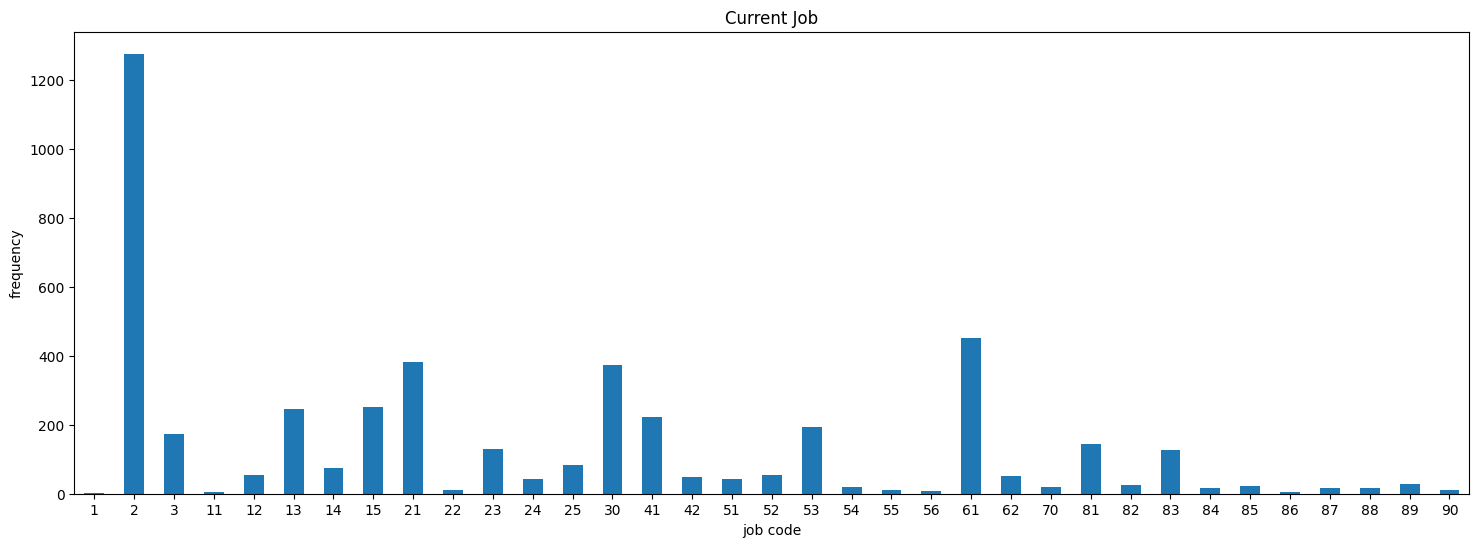

In [ ]:
# 취업 1년 후 직업 분포 (중분류)

distribution = df_worker['b156'].value_counts().sort_index()

plt.figure(figsize=(18, 6))
distribution.plot(kind='bar')
plt.title('Current Job')
plt.xlabel('job code')
plt.ylabel('frequency')
#xticks = [0,1,2,3,4,5,6,7,8,9]
plt.xticks(rotation=360)
plt.show()

##대학교 데이터

In [ ]:
# 데이터프레임 리스트
grade_dfs = [df_grade1, df_grade2, df_grade3, df_grade4]

# 각 데이터프레임에 대해 반복문으로 작업 수행
for i, df in enumerate(grade_dfs, start=1):
    # 결측값 제거
    df.dropna(subset=[f'when{i}hn', 'a245'], inplace=True)

    # 정수형 변환
    df['a245'] = df['a245'].astype(int)

    # 마지막 두 자리 제거
    df['a245'] = df['a245'].apply(remove_last_two_digits)

    # 99 제거
    df = df[df['a245'] != 99]

    # 수정된 데이터프레임을 다시 변수에 저장
    globals()[f'df_grade{i}'] = df

# 결과 확인 (예: df_grade4)
df_grade4.head(5)

,sampid,when4hn,a029,a029z,a031,a032,a033,a034,a035,a036,...,a591,a592,a593,a594,a595,a596,a597,a598,a599,a600
11,12,2010.0,901.0,9.0,1.0,NaN,NaN,2.0,ÇàÁ¤ÇÐ°ú,U02030700081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,26,2014.0,901.0,9.0,1.0,NaN,NaN,5.0,°£È£ÇÐ°ú,U06020100004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,33,2009.0,913.0,9.0,4.0,NaN,NaN,6.0,À½¾Ç±³À°°ú,U03050600007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,43,2013.0,913.0,9.0,1.0,NaN,NaN,2.0,Àç¹«±ÝÀ¶ÇÐ°ú,U02010500043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,51,2014.0,909.0,9.0,1.0,NaN,NaN,2.0,°æ¿µÇÐ°ú,U02010100035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
s1 = df_grade1.shape
s2 = df_grade2.shape
s3 = df_grade3.shape
s4 = df_grade4.shape


print(f"{s1}, {s2}, {s3}, {s4}")

(403, 235), (1022, 235), (1252, 235), (1753, 235)


In [ ]:
df_grade4['a245'].value_counts()

,count
a245,
2,400
21,221
41,177
30,166
15,164
13,111
3,105
14,74
23,73


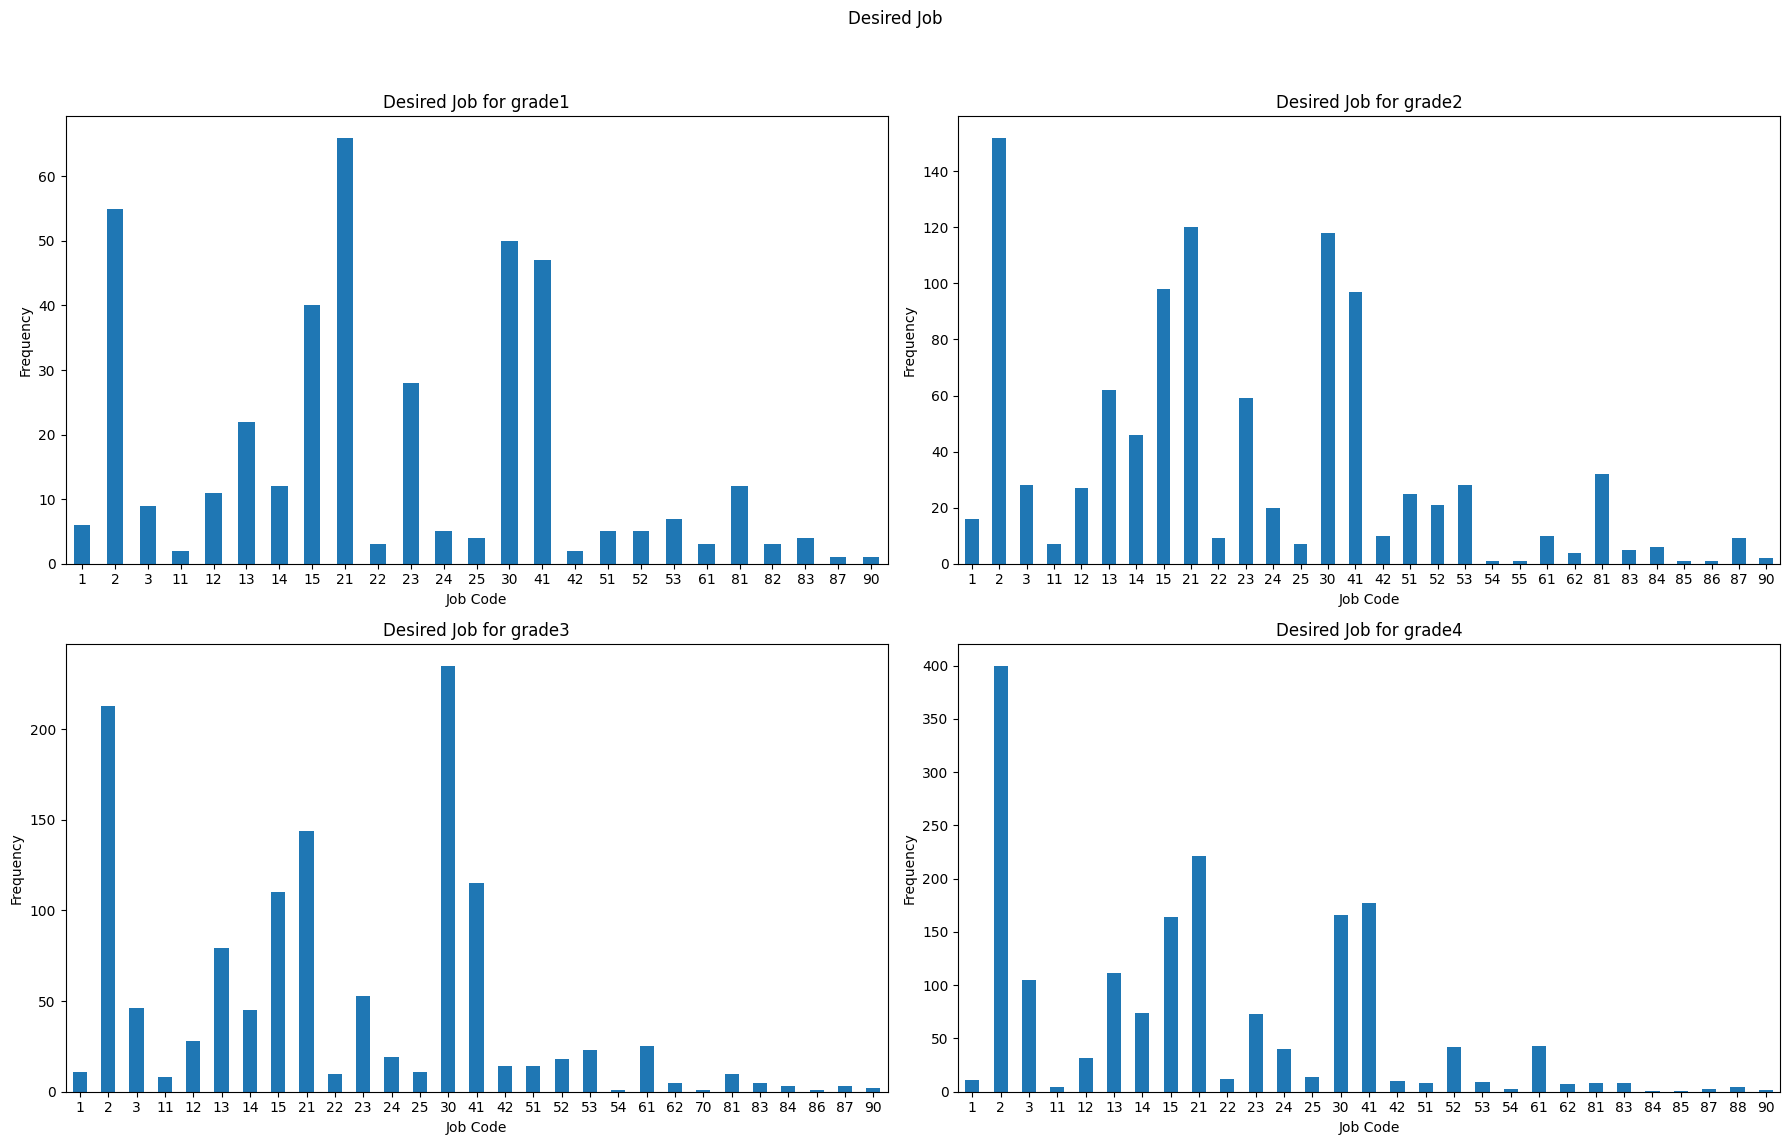

In [ ]:
# 학년별 희망 직업


fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Desired Job')

for i, ax in enumerate(axes.flat, start=1):
    df_grade = globals()[f'df_grade{i}']
    distribution = df_grade['a245'].value_counts().sort_index()

    distribution.plot(kind='bar', ax=ax)
    ax.set_title(f'Desired Job for grade{i}')
    ax.set_xlabel('Job Code')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(distribution)))
    ax.set_xticklabels(distribution.index, rotation=360)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# 병합할 데이터프레임 리스트
grade_dfs = [df_grade1, df_grade2, df_grade3, df_grade4]

# 반복문을 통해 데이터프레임 병합 및 'job' 열 추가
for i, df_grade in enumerate(grade_dfs, start=1):
    df_final = pd.merge(df_worker, df_grade, on='sampid', how='inner')
    df_final['job'] = (df_final['b156'] == df_final['a245']).astype(int)
    globals()[f'df_final{i}'] = df_final


df_final1.head(5)

,sampid,fromWhen,gender,yob,b153,b153z,b154,b156,b156z,b157,...,a592,a593,a594,a595,a596,a597,a598,a599,a600,job
0,14,2016,1,1988,551.0,9.0,1.0,2,0,410.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,190,2008,1,1990,843.0,15.0,3.0,25,2,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,222,2016,2,1992,855.0,16.0,1.0,21,2,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,224,2016,2,1992,649.0,11.0,1.0,2,0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,233,2018,1,1992,861.0,17.0,1.0,3,0,901.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,0


In [ ]:
# 결측치 처리
variables = ['a034', 'a266', 'a247', 'a065', 'a043', 'a059', 'a242', 'a245']

# Feature 리스트
feature1 = ['a034', 'a266', 'a247', 'a065', 'a043', 'a059']
feature2 = ['a242', 'a245']

# 9090908.0과 9090909.0을 NaN으로 대체
df_final4[feature1] = df_final4[feature1].replace({9090908.0: np.nan, 9090909.0: np.nan})

print(df_final4)

      sampid  fromWhen  gender   yob   b153  b153z  b154  b156  b156z    b157  \
0         12      2014       2  1988  855.0   16.0   1.0    21      2   113.0   
1         26      2015       2  1992  861.0   17.0   1.0    30      3   102.0   
2         33      2011       1  1987  851.0   16.0   1.0    21      2   906.0   
3         43      2014       2  1989  467.0    7.0   1.0     2      0   909.0   
4         52      2016       1  1991  853.0   16.0   1.0     2      0   913.0   
...      ...       ...     ...   ...    ...    ...   ...   ...    ...     ...   
1239   10183      2009       2  1986  861.0   17.0   1.0    30      3   410.0   
1240   10188      2012       1  1987  561.0    9.0   1.0    53      5   802.0   
1241   10195      2010       1  1982  301.0    3.0   3.0    81      8   831.0   
1242   10198      2015       2  1991  856.0   16.0   1.0    21      2   802.0   
1243   10205      2015       1  1991  551.0    9.0   2.0    13      1  1113.0   

      ...  a592  a593  a594

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and direc

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
df_final4 = df_final4[df_final4['a247'] != 13.0]

In [ ]:
df_final['job'].value_counts()

,count
job,
1,630
0,614


In [ ]:
# 남기고 싶은 열 목록
columns_to_keep = ['a034', 'a266', 'a247', 'a065', 'a043', 'a059', 'a242', 'a245', 'job']

# 해당 열만 남기기
df_final4 = df_final4[columns_to_keep]

# 새로운 열 이름 목록
titles = [
    '전공계열',
    '취업을 위해 준비한 스펙2 - 공인영어성적',
    '취업희망산업',
    '학점평균',
    '학교생활 만족도5 - 교수진 및 (담임)선생님',
    '전반적 학교성적',
    '<학생> 직업분야',
    '<학생> 희망직업코드',
    '희망직업일치여부'
]

# 열 이름 변경
df_final4.columns = titles



In [ ]:
# 값들을 int로 변환 (변환 불가능한 값들은 NaN으로 설정)
df_final4 = df_final4.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# 결과 확인
print(df_final4)

      전공계열  취업을 위해 준비한 스펙2 - 공인영어성적  취업희망산업  학점평균  학교생활 만족도5 - 교수진 및 (담임)선생님  \
0        2                        0       7     1                          2   
1        5                        2      10     1                          4   
2        6                        0       7     2                          1   
3        2                        0       8     2                          4   
4        1                        2       9     2                          2   
...    ...                      ...     ...   ...                        ...   
1239     5                        0      10     1                          4   
1240     2                        0      10     1                          3   
1241     4                        0       8     1                          5   
1242     7                        0       7     2                          4   
1243     4                        2       8     2                          4   

      전반적 학교성적  <학생> 직업분야  <학생> 희망직업코드 

In [ ]:
# 0 값을 NaN으로 변경하고 Int64 타입으로 변환
df_final4 = df_final4.astype('Int64').replace(0, np.nan)

# 결과 확인
print(df_final4)

      전공계열  취업을 위해 준비한 스펙2 - 공인영어성적  취업희망산업  학점평균  학교생활 만족도5 - 교수진 및 (담임)선생님  \
0        2                     <NA>       7     1                          2   
1        5                        2      10     1                          4   
2        6                     <NA>       7     2                          1   
3        2                     <NA>       8     2                          4   
4        1                        2       9     2                          2   
...    ...                      ...     ...   ...                        ...   
1239     5                     <NA>      10     1                          4   
1240     2                     <NA>      10     1                          3   
1241     4                     <NA>       8     1                          5   
1242     7                     <NA>       7     2                          4   
1243     4                        2       8     2                          4   

      전반적 학교성적  <학생> 직업분야  <학생> 희망직업코드 

In [ ]:
df_final4['<학생> 직업분야'].value_counts()

,count
<학생> 직업분야,
1,176
2,139
3,91
4,87
6,23
5,22
8,9


In [ ]:
# 엑셀 파일로 저장
file_path = 'df_final4.xlsx'
df_final4.to_excel(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to df_final4.xlsx


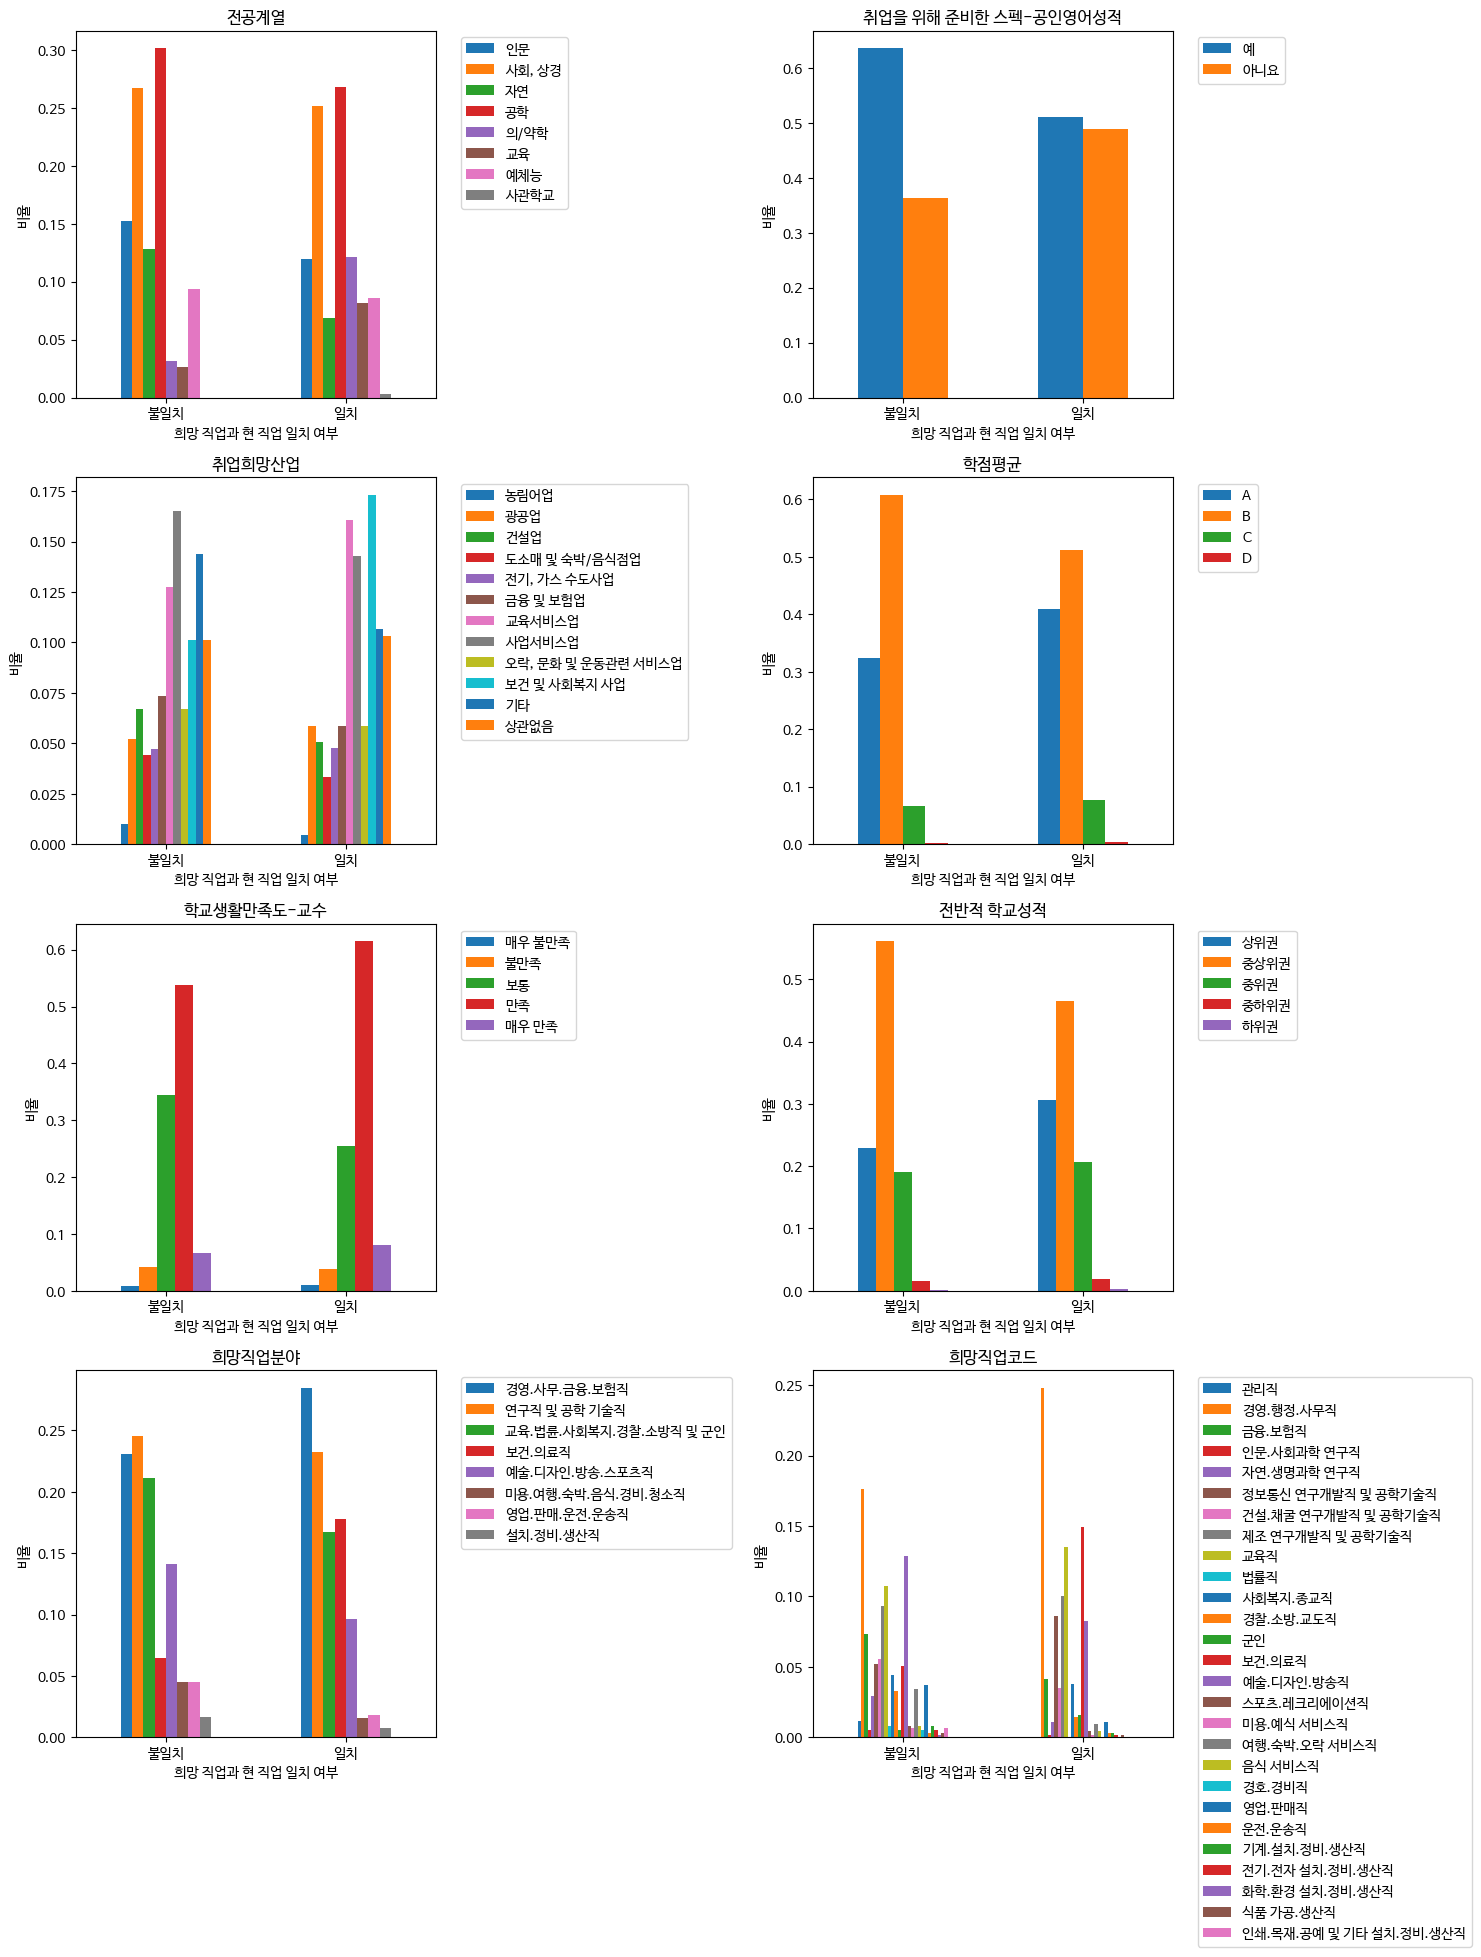

In [ ]:
# 사용자 정의 레이블 사전

value_labels = {
    'a034': {1.0: '인문', 2.0: '사회, 상경', 3.0: '자연', 4.0: '공학', 5.0: '의/약학', 6.0: '교육', 7.0: '예체능', 8: '사관학교'},
    'a266': {1.0: '예', 2.0: '아니요'},
    'a247': {1.0: '농림어업', 2.0: '광공업', 3.0: '건설업', 4.0: '도소매 및 숙박/음식점업', 5.0: '전기, 가스 수도사업',
             6.0: '금융 및 보험업', 7.0: '교육서비스업', 8.0: '사업서비스업', 9.0: '오락, 문화 및 운동관련 서비스업',
             10.0: '보건 및 사회복지 사업', 11.0: '기타', 12.0: '상관없음'},
    'a065': {1.0: 'A', 2.0: 'B', 3.0: 'C', 4.0: 'D', 5.0: 'F'},
    'a043': {1.0: '매우 불만족', 2.0: '불만족', 3.0: '보통', 4.0: '만족', 5.0: '매우 만족'},
    'a059': {1.0: '상위권', 2.0: '중상위권', 3.0: '중위권', 4.0: '중하위권', 5.0: '하위권'},
    'a242': {0.0: '경영.사무.금융.보험직', 1.0: '연구직 및 공학 기술직', 2.0: '교육.법률.사회복지.경찰.소방직 및 군인', 3.0: '보건.의료직',
             4.0: '예술.디자인.방송.스포츠직', 5.0: '미용.여행.숙박.음식.경비.청소직', 6.0: '영업.판매.운전.운송직', 7.0: '건설.채굴직',
             8.0: '설치.정비.생산직', 9.0: '농림어업직'},
    'a245': {1: '관리직', 2: '경영.행정.사무직', 3: '금융.보험직', 11: '인문.사회과학 연구직', 12: '자연.생명과학 연구직', 13: '정보통신 연구개발직 및 공학기술직',
             14: '건설.채굴 연구개발직 및 공학기술직', 15: '제조 연구개발직 및 공학기술직', 21: '교육직', 22: '법률직', 23: '사회복지.종교직', 24: '경찰.소방.교도직',
             25: '군인', 30: '보건.의료직', 41: '예술.디자인.방송직', 42: '스포츠.레크리에이션직', 51: '미용.예식 서비스직', 52: '여행.숙박.오락 서비스직', 53: '음식 서비스직',
             54: '경호.경비직', 61: '영업.판매직', 62: '운전.운송직', 81: '기계.설치.정비.생산직', 83: '전기.전자 설치.정비.생산직', 85: '화학.환경 설치.정비.생산직', 87: '식품 가공.생산직',
             88: '인쇄.목재.공예 및 기타 설치.정비.생산직'}}




# 서브플롯 생성: 4행 2열
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# 배열 평탄화 (iteration을 쉽게 하기 위해)
axes = axes.flatten()

titles = [
    '전공계열',
    '취업을 위해 준비한 스펙-공인영어성적',
    '취업희망산업',
    '학점평균',
    '학교생활만족도-교수',
    '전반적 학교성적',
    '희망직업분야',
    '희망직업코드'
]

# 그래프 생성
for i, var in enumerate(variables):
    ax = axes[i]
    # 각 그룹 내에서 변수를 비율로 정규화
    df_grouped = df_final4.groupby('job')[var].value_counts(normalize=True).unstack().fillna(0)
    df_grouped.plot(kind='bar', ax=ax)

    # 사용자 정의 레이블을 범례에 적용
    if var in value_labels:
        custom_labels = [value_labels[var].get(float(label), str(label)) for label in df_grouped.columns]
        ax.legend(labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.set_title(titles[i])  # 각 subplot에 개별 제목 설정
    ax.set_xlabel('희망 직업과 현 직업 일치 여부')
    ax.set_ylabel('비율')
    ax.set_xticklabels(['불일치', '일치'], rotation=360)

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 카이제곱검정 (범주형 변수)

In [ ]:
from scipy.stats import chi2_contingency

# 변수 리스트
variables = [
    'a029', 'a029z', 'a031', 'a032', 'a033', 'a034', 'a035', 'a036', 'a037', 'a038', 'a124',
    'a106', 'a107', 'a108', 'a109', 'a110', 'a111', 'a112', 'a113', 'a114', 'a039', 'a040',
    'a041', 'a042', 'a043', 'a044', 'a045', 'a046', 'a047', 'a048', 'a049', 'a050', 'a051',
    'a052', 'a053', 'a054', 'a055', 'a056', 'a057', 'a058', 'a059', 'a065', 'a075', 'a076',
    'a077', 'a078', 'a079', 'a080', 'a081', 'a082', 'a123', 'a084', 'a085', 'a086', 'a087',
    'a088', 'a089', 'a090', 'a091', 'a092', 'a093', 'a094', 'a095', 'a096', 'a115', 'a116',
    'a117', 'a118', 'a119', 'a120', 'a121', 'a122', 'a097', 'a098', 'a099', 'a100', 'a101',
    'a102', 'a103', 'a201', 'a223', 'a224', 'a225', 'a226', 'a227', 'a228', 'a229', 'a230',
    'a231', 'a232', 'a233', 'a234', 'a265', 'a266', 'a267', 'a268', 'a269', 'a270', 'a271',
    'a272', 'a273', 'a274', 'a275', 'a276', 'a277', 'a278', 'a362', 'a601', 'a363', 'a364',
    'a365', 'a366', 'a367', 'a368', 'a369', 'a370', 'a371', 'a372', 'a373', 'a374', 'a375',
    'a241', 'a242', 'a243', 'a244', 'a245', 'a246', 'a294', 'a387', 'a247', 'a248', 'a249',
    'a250', 'a251', 'a252', 'a253', 'a254', 'a255', 'a256', 'a257', 'a258', 'a259', 'a260',
    'a261', 'a262', 'a263', 'a264', 'a401', 'a402', 'a409', 'a410', 'a411', 'a417', 'a418',
    'a419', 'a425', 'a426', 'a427', 'a433', 'a434', 'a435', 'a441', 'a442', 'a443', 'a501',
    'a502', 'a503', 'a505', 'a506', 'a507', 'a508', 'a514', 'a515', 'a517', 'a518', 'a519',
    'a520', 'a521', 'a522', 'a524', 'a525', 'a526', 'a527', 'a533', 'a534', 'a535', 'a536',
    'a537', 'a538', 'a539', 'a540', 'a541', 'a543', 'a544', 'a545', 'a546', 'a552', 'a553',
    'a554', 'a555', 'a556', 'a557', 'a558', 'a559', 'a560', 'a562', 'a563', 'a564', 'a565',
    'a571', 'a572', 'a573', 'a574', 'a575', 'a576', 'a577', 'a578', 'a579', 'a581', 'a582',
    'a583', 'a584', 'a590', 'a591', 'a592', 'a593', 'a594', 'a595', 'a596', 'a597', 'a598',
    'a599', 'a600'
]

# 결과 저장용 리스트
results = []

for var in variables:
    # 결측치 제거
    df_temp = df_final4[['job', var]].dropna()

    # 교차표 생성
    contingency_table = pd.crosstab(df_temp['job'], df_temp[var])

    # 교차표가 비어있지 않은지 확인
    if not contingency_table.empty and contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append((var, chi2, p, dof))
    else:
        results.append((var, None, None, None))

# 결과 출력
for result in results:
    if result[1] is not None:
        print(f"Variable: {result[0]}, Chi2: {result[1]:.2f}, p-value: {result[2]:.4f}, dof: {result[3]}")
    else:
        print(f"Variable: {result[0]}, No data available for Chi2 test")

Variable: a029, Chi2: 130.39, p-value: 0.3069, dof: 123
Variable: a029z, Chi2: 12.90, p-value: 0.7426, dof: 17
Variable: a031, Chi2: 19.28, p-value: 0.0074, dof: 7
Variable: a032, Chi2: 2.25, p-value: 0.3251, dof: 2
Variable: a033, Chi2: 0.64, p-value: 0.8864, dof: 3
Variable: a034, Chi2: 67.43, p-value: 0.0000, dof: 8
Variable: a035, Chi2: 529.63, p-value: 0.0173, dof: 463
Variable: a036, Chi2: 525.59, p-value: 0.0359, dof: 469
Variable: a037, No data available for Chi2 test
Variable: a038, No data available for Chi2 test
Variable: a124, Chi2: 0.44, p-value: 0.8036, dof: 2
Variable: a106, Chi2: 2.06, p-value: 0.3574, dof: 2
Variable: a107, Chi2: 3.38, p-value: 0.3363, dof: 3
Variable: a108, Chi2: 0.05, p-value: 0.8204, dof: 1
Variable: a109, Chi2: 7.18, p-value: 0.0276, dof: 2
Variable: a110, Chi2: 5.71, p-value: 0.1264, dof: 3
Variable: a111, Chi2: 9.58, p-value: 0.3853, dof: 9
Variable: a112, Chi2: 5.71, p-value: 0.3350, dof: 5
Variable: a113, Chi2: 2.41, p-value: 0.4923, dof: 3
Var

In [ ]:
# 결과 저장용 리스트
significant_results = []

for var in variables:
    # 결측치 제거
    df_temp = df_final4[['job', var]].dropna()

    # 교차표 생성
    contingency_table = pd.crosstab(df_temp['job'], df_temp[var])

    # 교차표가 비어있지 않은지 확인
    if not contingency_table.empty and contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < 0.05:
            significant_results.append((var, chi2, p, dof))
    else:
        print(f"Variable: {var}, No data available for Chi2 test")

# 결과 출력 (p-value가 0.05 미만인 변수만)
for result in significant_results:
    print(f"Variable: {result[0]}, Chi2: {result[1]:.2f}, p-value: {result[2]:.4f}, dof: {result[3]}")

Variable: a037, No data available for Chi2 test
Variable: a038, No data available for Chi2 test
Variable: a076, No data available for Chi2 test
Variable: a123, No data available for Chi2 test
Variable: a119, No data available for Chi2 test
Variable: a120, No data available for Chi2 test
Variable: a121, No data available for Chi2 test
Variable: a122, No data available for Chi2 test
Variable: a601, No data available for Chi2 test
Variable: a241, No data available for Chi2 test
Variable: a425, No data available for Chi2 test
Variable: a426, No data available for Chi2 test
Variable: a427, No data available for Chi2 test
Variable: a433, No data available for Chi2 test
Variable: a434, No data available for Chi2 test
Variable: a435, No data available for Chi2 test
Variable: a441, No data available for Chi2 test
Variable: a442, No data available for Chi2 test
Variable: a443, No data available for Chi2 test
Variable: a527, No data available for Chi2 test
Variable: a031, Chi2: 19.28, p-value: 0.

In [ ]:
significant_results

[('a031', 19.280277651516585, 0.007353226061525174, 7),
 ('a034', 67.42723996946003, 1.595180777732272e-11, 8),
 ('a035', 529.626140073229, 0.01725218711269666, 463),
 ('a036', 525.5883907751361, 0.0359499518319343, 469),
 ('a109', 7.179487179487179, 0.0276054078255501, 2),
 ('a043', 11.584712205405065, 0.04094325021155107, 5),
 ('a053', 10.600559958328681, 0.03143963548059082, 4),
 ('a054', 9.677307124325946, 0.021518032281179312, 3),
 ('a059', 13.049617315202457, 0.04225475174594593, 6),
 ('a065', 12.473735909254712, 0.02884258704731742, 5),
 ('a223', 4.10123508017863, 0.04285189921991679, 1),
 ('a227', 6.106091664176645, 0.013471671002689763, 1),
 ('a230', 7.351362612769515, 0.006701194732112963, 1),
 ('a266', 4.774191322564293, 0.028889411647724853, 1),
 ('a269', 6.9997233747289265, 0.008152231262779194, 1),
 ('a363', 11.396837908752264, 0.022448141935495727, 4),
 ('a364', 10.241146922190849, 0.036555717840112925, 4),
 ('a242', 36.96333153267163, 4.7662776678157164e-06, 7),
 ('a243

In [ ]:
# 연속형 변수 찾기

# 결과 저장용 리스트
fvalue = []

# 결과 리스트에서 dof가 10 이상인 변수만 추출
for result in results:
    if result[3] is not None and result[3] >= 10:
        fvalue.append(result)

# fvalue 리스트 출력
for item in fvalue:
    print(f"Variable: {item[0]}, Chi2: {item[1]:.2f}, p-value: {item[2]:.4f}, dof: {item[3]}")

Variable: a029, Chi2: 130.39, p-value: 0.3069, dof: 123
Variable: a029z, Chi2: 12.90, p-value: 0.7426, dof: 17
Variable: a035, Chi2: 529.63, p-value: 0.0173, dof: 463
Variable: a036, Chi2: 525.59, p-value: 0.0359, dof: 469
Variable: a048, Chi2: 7.91, p-value: 0.8494, dof: 13
Variable: a078, Chi2: 10.00, p-value: 0.4405, dof: 10
Variable: a079, Chi2: 10.00, p-value: 0.4405, dof: 10
Variable: a081, Chi2: 68.42, p-value: 0.3619, dof: 65
Variable: a082, Chi2: 86.41, p-value: 0.3774, dof: 83
Variable: a098, Chi2: 12.17, p-value: 0.2740, dof: 10
Variable: a100, Chi2: 27.06, p-value: 0.6199, dof: 30
Variable: a243, Chi2: 754.15, p-value: 0.0036, dof: 653
Variable: a244, Chi2: 1183.54, p-value: 0.2943, dof: 1158
Variable: a245, Chi2: 118.01, p-value: 0.0000, dof: 26
Variable: a247, Chi2: 24.45, p-value: 0.0273, dof: 13
Variable: a251, Chi2: 45.07, p-value: 0.2329, dof: 39
Variable: a503, Chi2: 13.15, p-value: 0.2153, dof: 10
Variable: a506, Chi2: 17.20, p-value: 0.0700, dof: 10
Variable: a515,

## F 검정 (연속형 변수)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 데이터프레임 df_final4와 'job', 'a048', 'a502' 변수가 있어야 합니다.

# 변수 리스트
variables = ['a048', 'a502']

# 결과 저장용 리스트
anova_results = []

for var in variables:
    # 결측치 제거
    df_temp = df_final4[['job', var]].dropna()

    # ANOVA 모델 적합
    model = smf.ols(f'{var} ~ C(job)', data=df_temp).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # typ=2은 Type II SS를 사용

    # F-값과 p-value 추출
    f_value = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]

    # 결과 저장
    anova_results.append((var, f_value, p_value))

# 결과 출력
for result in anova_results:
    print(f"Variable: {result[0]}, F-value: {result[1]:.2f}, p-value: {result[2]:.4f}")

Variable: a048, F-value: 0.53, p-value: 0.4693
Variable: a502, F-value: 0.31, p-value: 0.5794


<ipython-input-18-1d7e2572d87b>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_value = anova_table['F'][0]
<ipython-input-18-1d7e2572d87b>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
<ipython-input-18-1d7e2572d87b>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_value = anova_table['F'][0]
<ipython-input-18-1d7e2572d87b>:22: FutureWarning: Series.__getitem__ treating keys as position

##다중공선성

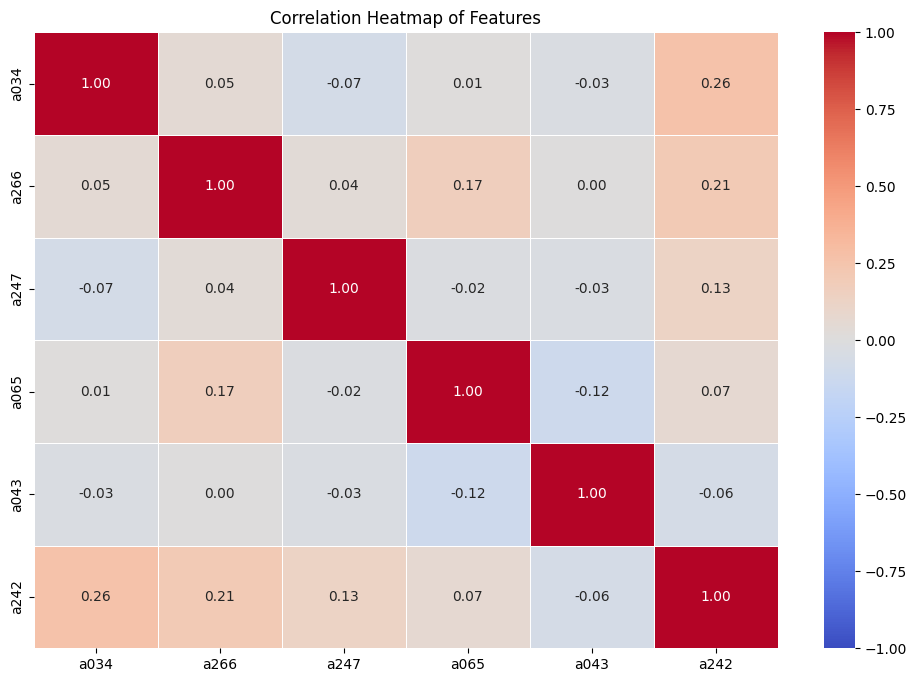

In [ ]:
import seaborn as sns

features = ['a034', 'a266', 'a247', 'a065', 'a043', 'a242']

df_features = df_final4[features]

# 상관관계 행렬 계산
corr_matrix = df_features.corr(method='spearman')

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# a065, a043, a059 빼기

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

# Features to be included after removing a065, a043, a059, a245
selected_features = ['a034', 'a266', 'a247', 'a065', 'a043', 'a059', 'a242', 'a245']

# Subset the dataframe with the selected features
df_selected = df_final4[selected_features]

# Check for missing or infinite values and handle them
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
df_selected.dropna(inplace=True)

# Add a constant term for the intercept
df_selected['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df_selected.columns
vif_data['VIF'] = [variance_inflation_factor(df_selected.values, i) for i in range(df_selected.shape[1])]
.경
# Display the VIF values
print(vif_data)

     Feature         VIF
0       a034    1.080813
1       a266    1.066537
2       a247    1.081526
3       a065    2.437748
4       a043    1.073317
5       a059    2.525291
6       a242  183.425400
7       a245  182.803787
8  Intercept   70.491280


<ipython-input-21-906cb7b20d62>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-21-906cb7b20d62>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
<ipython-input-21-906cb7b20d62>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Intercept'] = 1


##로지스틱 회귀

In [ ]:
import statsmodels.api as sm

# 데이터프레임에서 필요한 피처만 선택
independent_vars = ['a034', 'a043', 'a266', 'a247', 'a065', 'a242']
dependent_var = 'job'

# 결측치 처리
df_final4 = df_final4.dropna(subset=[dependent_var] + independent_vars)

# 데이터 유형 확인 및 변환 (범주형 변수로 설정)
for column in independent_vars:
    df_final4[column] = df_final4[column].astype('category')

# 범주형 변수 더미 변수로 변환
df_dummies = pd.get_dummies(df_final4[independent_vars], drop_first=True)

# 종속 변수 추가
df_dummies[dependent_var] = df_final4[dependent_var]

# 독립 변수와 종속 변수 선택
X = df_dummies.drop(dependent_var, axis=1)
y = df_dummies[dependent_var]

# True/False를 1/0으로 변환
X = X.astype(int)

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 생성 및 학습
model = sm.Logit(y, X)
result = model.fit()

# 결과 출력
print(result.summary())

         Current function value: 0.600280
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    job   No. Observations:                  332
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                           32
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.1307
Time:                        07:23:57   Log-Likelihood:                -199.29
converged:                      False   LL-Null:                       -229.26
Covariance Type:            nonrobust   LLR p-value:                  0.001985
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5901      1.621     -0.364      0.716      -3.767       2.587
a034_2.0       1.0721      0.441      2.431      0.015       0.20

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
df_dummies.shape

(332, 33)

In [ ]:
df_dummies['job'].value_counts()

,count
job,
1,178
0,154
